Thêm thư viện

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
)
import joblib
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []

Xử lý dữ liệu

In [2]:
# Load dữ liệu
data=pd.read_csv("bank-full.csv",delimiter=';')

print("Số thuộc tính: ",len(data.columns))
n=len(data.columns)
print(data)

# Lấy danh sách các cột categorical
categorical_cols = data.select_dtypes(include=['object']).columns

# Lặp qua các cột categorical và in số lượng giá trị khác nhau
for col in categorical_cols:
    print(f"Thuộc tính '{col}':")
    value_counts = data[col].value_counts()
    for value, count in value_counts.items():
        print(f"  {value}: {count}")
    print()


# In tên thuộc tính
ds_thuoctinh = list(data.iloc[:,0:n-1].columns)
print("Các thuộc tính của tập dữ liệu: ",ds_thuoctinh)

cac_nhan=list(np.unique(data.iloc[:,-1:]))
print("Cột nhãn: ",list(data.iloc[:,-1:].columns))
print("Các nhãn: ",cac_nhan)

# Điếm giá trị của cột nhãn
print(data.iloc[:,-1:].value_counts())

# Giá trị thiếu
print("Missing value:")
print((data[ds_thuoctinh]=='').sum())

#Tiền xử lý dữ liệu
list_dt = []
le = preprocessing.LabelEncoder()


for (columnName, columnData) in data.iloc[:,0:n-1].items():
    # Kiểm tra nếu dữ liệu không phải là số
    if not pd.to_numeric(columnData, errors='coerce').notnull().all():
        le.fit(list(data[columnName]))
        nhan_cot = set(list(data[columnName]))
        data[columnName] = le.transform(list(data[columnName]))
        dic_dt = {}
        for i in nhan_cot:
            dic_dt[i] = int(le.transform([i])[0])
        list_dt.append(dic_dt)
    else:
        list_dt.append({})  # Thêm một từ điển trống nếu dữ liệu là số

X_data = data.iloc[:,0:n-1]
y_target = data.iloc[:,-1:]

for i in range(len(list_dt)):
    print(ds_thuoctinh[i])
    print(list_dt[i])

print(data)

# save the results to a new file
data.to_csv('bank_numbered.csv', index=False)


# Chuẩn hóa ALL
# Chọn cột kiểu số để chuẩn hóa
numeric_cols = data.select_dtypes(include=['int']).columns

# Danh sách các cột số cần chuẩn hóa
print(numeric_cols)
# # Hiển thị thống kê mô tả các thuộc tính số
# print(car_ev.describe())

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


# save the results to a new file
data.to_csv('bank_standardized.csv', index=False)

print(data)

Số thuộc tính:  17
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  dur

Load dữ liệu tập đã được xử lý

In [3]:
# Load the dataset
def loadData(path):
  f=open(path, "r")
  data = csv.reader(f)
  data = np.array(list(data))
  data = np.delete(data,0,0)
  np.random.shuffle(data)
  f.close()
  return data

dulieuLoad = loadData("bank_standardized.csv")

dulieu_X_temp = dulieuLoad[:, :-1]  # Lấy tất cả các cột ngoại trừ cột cuối cùng
dulieu_X = dulieu_X_temp.astype(np.float64)

dulieu_Y = dulieuLoad[:, -1]   # Lấy cột cuối cùng làm dữ liệu nhãn

print('dulieu_X',dulieu_X)
print('dulieu_Y',dulieu_Y)
print(dulieuLoad)

dulieu_X [[0.41558442 0.81818182 0.5        ... 0.         0.         1.        ]
 [0.15584416 0.09090909 1.         ... 0.         0.         1.        ]
 [0.27272727 0.63636364 0.5        ... 0.         0.         1.        ]
 ...
 [0.1038961  0.90909091 0.5        ... 0.         0.         1.        ]
 [0.31168831 0.09090909 0.5        ... 0.37614679 0.00727273 0.        ]
 [0.27272727 0.36363636 0.5        ... 0.         0.         1.        ]]
dulieu_Y ['no' 'yes' 'no' ... 'no' 'no' 'no']
[['0.41558441558441556' '0.8181818181818182' '0.5' ... '0.0' '1.0' 'no']
 ['0.15584415584415584' '0.09090909090909091' '1.0' ... '0.0' '1.0' 'yes']
 ['0.27272727272727276' '0.6363636363636364' '0.5' ... '0.0' '1.0' 'no']
 ...
 ['0.10389610389610388' '0.9090909090909092' '0.5' ... '0.0' '1.0' 'no']
 ['0.31168831168831174' '0.09090909090909091' '0.5' ...
  '0.007272727272727273' '0.0' 'no']
 ['0.27272727272727276' '0.36363636363636365' '0.5' ... '0.0' '1.0' 'no']]


In [4]:
by = list()
dt = list()
rf = list()
bg = list()

f1_scores = {}

Huấn luyện Gauss 10 lần

Model saved as 'model_bayes.pkl'.
Acc=74.42231824159309, Prec=76.56390364888763, Recall=74.42231824159309, F1=73.89509821886243
Độ chính xác trên tập huấn luyện: 73.85828835267041
Độ chính xác trên tập kiểm tra: 73.89509821886243


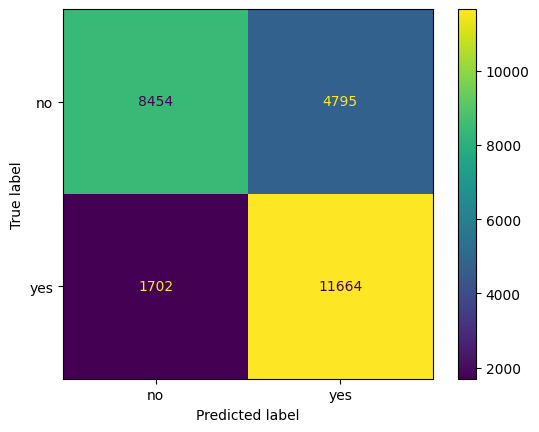

In [5]:
import random
import statistics

# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

temp=[]
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

best_f1 = 0 
best_model = None
best_conf_matrix = None

for each in range(1,11):

  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape

  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm, y_sm, test_size=1/3, random_state=each)

  model = GaussianNB()
  model.fit(X_Train, Y_Train)

  Y_Pred_train = model.predict(X_Train)
  Y_Pred = model.predict(X_Test)

  Ketqua_accuracy = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_precision = precision_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_recall = recall_score(Y_Test, Y_Pred, average='weighted')*100

  Ketqua_f1 = f1_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  by.append(Ketqua_f1)

  avg_acc.append(Ketqua_accuracy)
  avg_prec.append(Ketqua_precision)
  avg_rec.append(Ketqua_recall)
  avg_f1.append(Ketqua_f1)
  avg_f1_train.append(Ketqua_f1_train)

  if Ketqua_f1 > best_f1:
    best_f1 = Ketqua_f1
    best_model = model
    best_conf_matrix = confusion_matrix(Y_Test, Y_Pred)


acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
recall = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

# Lưu mô hình tốt nhất xuống tệp 
if best_model is not None:
    joblib.dump(best_model, 'model_bayes.pkl')
    print("Model saved as 'model_bayes.pkl'.")
else:
    print("No best model found.")

print("Acc={}, Prec={}, Recall={}, F1={}".format(acc, prec, recall, f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

# Hiển thị confusion matrix của mô hình tốt nhất
if best_conf_matrix is not None:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=cac_nhan)
    disp.plot()
else:
    print("No best confusion matrix found.")

f1_scores['Bayes'] = f1

Huấn luyện Decision Tree 10 lần

Model saved as 'model_dt.pkl'.
Acc=87.27972947585948, Prec=87.32108790588074, Recall=87.27972947585948, F1=87.2763863913794
Độ chính xác trên tập huấn luyện: 88.42535586251988
Độ chính xác trên tập kiểm tra: 87.2763863913794


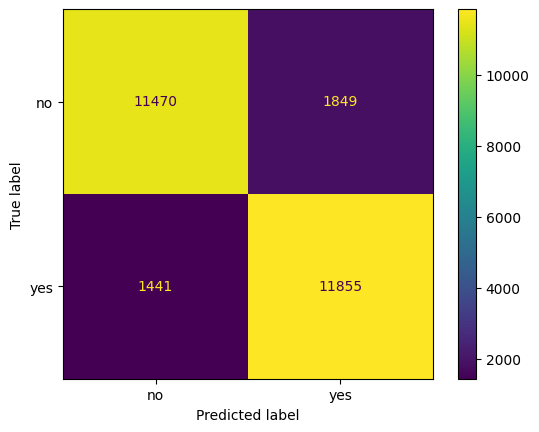

In [6]:
import random
import statistics
# import graphviz
# from matplotlib import pyplot as plt
# from sklearn import datasets
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

temp=[]
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

best_f1 = 0 
best_model = None
best_conf_matrix = None


for each in range(1,11):

  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape

  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm, y_sm, test_size=1/3, random_state=100)

  model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=10, min_samples_split=100, min_samples_leaf=10, max_features=16)
  model.fit(X_Train, Y_Train)

#   X_Train_df = pd.DataFrame(X_Train)

#   fig = plt.figure(figsize=(25, 20))
#   _ = tree.plot_tree(model,
#                     feature_names=X_Train_df.columns,
#                     class_names=model.classes_,
#                     filled=True)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)

  Ketqua_accuracy = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_precision = precision_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_recall = recall_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1 = f1_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  dt.append(Ketqua_f1)

  avg_acc.append(Ketqua_accuracy)
  avg_prec.append(Ketqua_precision)
  avg_rec.append(Ketqua_recall)
  avg_f1.append(Ketqua_f1)
  avg_f1_train.append(Ketqua_f1_train)

  if Ketqua_f1 > best_f1:
    best_f1 = Ketqua_f1
    best_model = model
    best_conf_matrix = confusion_matrix(Y_Test, Y_Pred)


acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
recall = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

# Lưu mô hình tốt nhất xuống tệp 
if best_model is not None:
    joblib.dump(best_model, 'model_dt.pkl')
    print("Model saved as 'model_dt.pkl'.")
else:
    print("No best model found.")

print("Acc={}, Prec={}, Recall={}, F1={}".format(acc, prec, recall, f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

# Hiển thị confusion matrix của mô hình tốt nhất
if best_conf_matrix is not None:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=cac_nhan)
    disp.plot()
else:
    print("No best confusion matrix found.")

f1_scores['Decision Tree'] = f1

Huấn luyện Random Forest 10 lần

Model saved as 'model_rf.pkl'.
Acc=87.92598158932933, Prec=88.08573602707028, Recall=87.92598158932933, F1=87.90999487324991
Độ chính xác trên tập huấn luyện: 88.53572609089017
Độ chính xác trên tập kiểm tra: 87.90999487324991


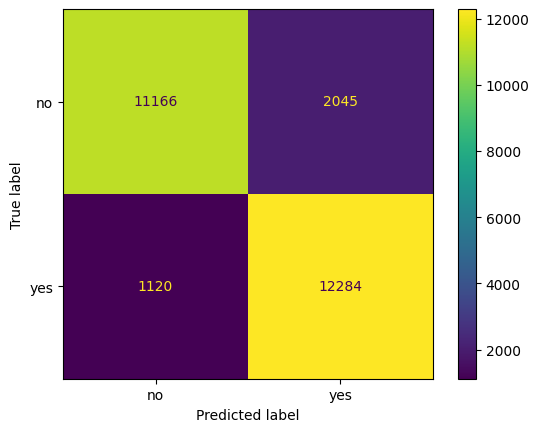

In [7]:
import random
import statistics

# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

temp=[]
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

best_f1 = 0 
best_model = None
best_conf_matrix = None

for each in range(1,11):
  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape

  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm, y_sm, test_size=1/3, random_state=125 )

  model = RandomForestClassifier(n_estimators=500,
                                   criterion='gini',
                                   bootstrap=True,
                                   max_samples=800)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)


  Ketqua_accuracy = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_precision = precision_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_recall = recall_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1 = f1_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  rf.append(Ketqua_f1)

  avg_acc.append(Ketqua_accuracy)
  avg_prec.append(Ketqua_precision)
  avg_rec.append(Ketqua_recall)
  avg_f1.append(Ketqua_f1)
  avg_f1_train.append(Ketqua_f1_train)

  if Ketqua_f1 > best_f1:
    best_f1 = Ketqua_f1
    best_model = model
    best_conf_matrix = confusion_matrix(Y_Test, Y_Pred)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
recall = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

# Lưu mô hình tốt nhất xuống tệp 
if best_model is not None:
    joblib.dump(best_model, 'model_rf.pkl')
    print("Model saved as 'model_rf.pkl'.")
else:
    print("No best model found.")

print("Acc={}, Prec={}, Recall={}, F1={}".format(acc, prec, recall, f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

# Hiển thị confusion matrix của mô hình tốt nhất
if best_conf_matrix is not None:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=cac_nhan)
    disp.plot()
else:
    print("No best confusion matrix found.")

f1_scores['Random Forest'] = f1

Huấn luyện Bagging 10 lần

In [8]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

for each in range(1,11):
  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm,y_sm, test_size=1/3, random_state=125 )

  model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=10, random_state=each), 
                            n_estimators=10, max_samples=0.7, random_state=each)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  bg.append(Ketqua_f1)

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)
  avg_f1_train.append(Ketqua_f1_train)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

f1_scores['Bagging'] = f1

Acc:88.57185797482623 - Prec:88.68283283991778 - Rec:88.57185797482623 - F1:88.56103031297253
Độ chính xác trên tập huấn luyện: 89.26269551768095
Độ chính xác trên tập kiểm tra: 88.56103031297253


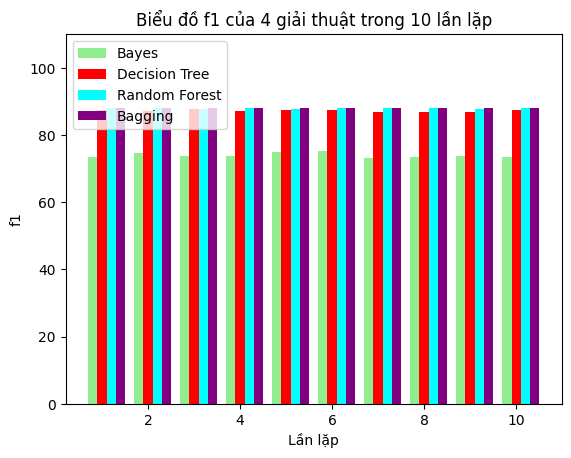

In [9]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
by = np.array(by)
dt = np.array(dt)
rf = np.array(rf)
bg = np.array(bg)
BAR_W = 0.2
plt.bar(x - BAR_W, by, color='lightgreen', width=BAR_W, label='Bayes')
plt.bar(x, dt, color='red', width=BAR_W, label='Decision Tree')
plt.bar(x + BAR_W, rf, color='cyan', width=BAR_W, label='Random Forest')
plt.bar(x + 2 * BAR_W, bg, color='purple', width=BAR_W, label='Bagging')
plt.legend(['Bayes', 'Decision Tree', 'Random Forest', 'Bagging'])
plt.title('Biểu đồ f1 của 4 giải thuật trong 10 lần lặp')
plt.xlabel('Lần lặp')
plt.ylabel('f1')
plt.ylim(0, 110)
plt.show()

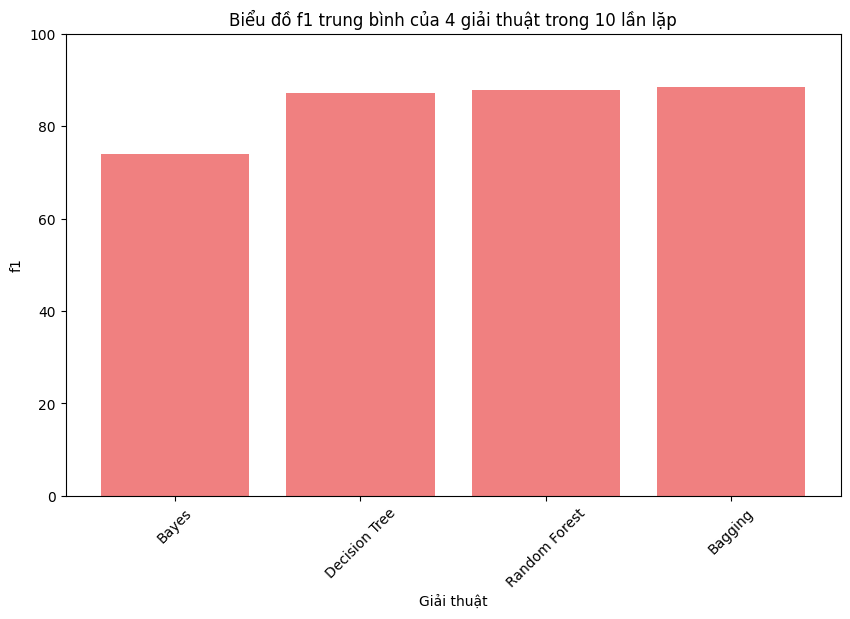

In [10]:
algorithms = list(f1_scores.keys())
f1_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_values, color = 'lightcoral')
plt.xlabel('Giải thuật')
plt.ylabel('f1')
plt.title('Biểu đồ f1 trung bình của 4 giải thuật trong 10 lần lặp')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

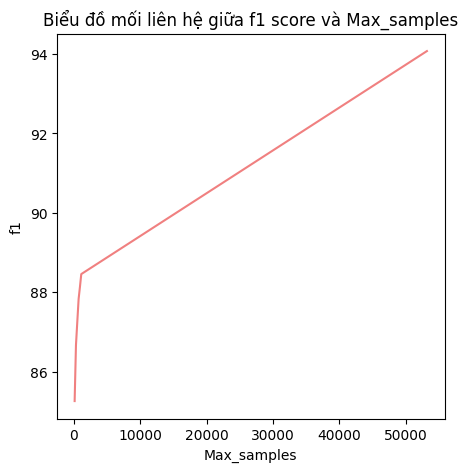

Độ chính xác chi tiết của biểu đồ thể hiện f1_score và Max_samples
{100: 85.258, 300: 86.667, 500: 87.252, 700: 87.829, 900: 88.131, 1100: 88.455, 53229: 94.068}
f1 lớn nhất:  94.068


In [11]:


X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
X_sm.shape, y_sm.shape

X_train, X_test, y_train,y_test=train_test_split(X_sm, y_sm, test_size=1/3,random_state=5)
y_train = np.ravel(y_train)
x=[100, 300, 500, 700, 900, 1100, len(X_train)]
y=list()
for i in x:
    random_fr=RandomForestClassifier(n_estimators=500,
                                  criterion = 'gini',
                                  bootstrap = True,
                                  max_samples =i)
    random_fr.fit(X_train,y_train)
    random_fr_predict= random_fr.predict(X_test)
    y.append(f1_score(y_test,random_fr_predict,average='macro')*100)
plt.figure(figsize=(5,5))
plt.title('Biểu đồ mối liên hệ giữa f1 score và Max_samples')
plt.plot(x,y, color='lightcoral')
plt.xlabel('Max_samples')
plt.ylabel('f1')
plt.show()
di=dict()
print('Độ chính xác chi tiết của biểu đồ thể hiện f1_score và Max_samples')
for i in range(len(x)):
    di[x[i]]=round(y[i],3)
print(di)
print('f1 lớn nhất: ', max(di.values()))

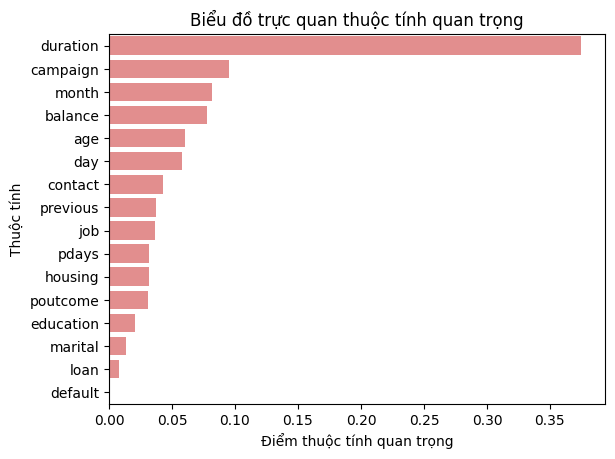

In [12]:
feature_impor = pd.Series(random_fr.feature_importances_,index=ds_thuoctinh).sort_values(ascending=False)
sns.barplot(x=feature_impor, y=feature_impor.index, color='lightcoral')

plt.xlabel('Điểm thuộc tính quan trọng')
plt.ylabel('Thuộc tính')
plt.title("Biểu đồ trực quan thuộc tính quan trọng")
plt.show()

# Nhận xét: Điểm của các cột không chênh lệch nhiều => ít dữ liệu nhiễu
# Xóa một trong các thuộc tính thì độ chính xác giảm